# Motion Prototype Generation

Example usage of motion prototype generator.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from actprogen import effect_based_prototypes

## Data Load

In [2]:
df_data = pd.read_csv("data/motion_samples.csv")
df_data = df_data[df_data['robot_in_map'] == True]
df_data = df_data.sample(n=2000,random_state=42)

## Effect and Motion Dimensions

In [3]:
effect_dims = ['dy','dz']
motion_dims = ['magnitude', 'angle']

## Prototype Generation

In [4]:
prototype_generator = effect_based_prototypes.ActionPrototypes(df_data, motion_dims)
prototype_generator.generate(effect_dimensions=effect_dims, prototypes_per_cluster=5)
print(prototype_generator.action_prototypes)

Max prototypes per cluster:  [1. 4. 5. 4. 1. 4.]
[[521.8232493   28.05258621]
 [854.69744145  83.25362202]
 [699.53218897  48.57449151]
 [632.08184014  77.42507679]
 [543.16870969  59.87096614]
 [444.67402813  50.49503795]
 [557.20967973  81.88240445]
 [346.52633003  67.13726094]
 [707.76563708  81.43647625]
 [594.1009039   49.10386525]
 [458.17673359  67.28025775]
 [239.82361635  53.66581633]
 [594.74907216  59.47625894]
 [876.55395812  82.79629461]
 [675.71129241  76.55549749]]


## Visualitation

In [5]:
colors = ['red', 'green', 'blue', 'magenta', 'yellow', 'pink', 'cyan']

def color_picker(x):
    return colors[x]

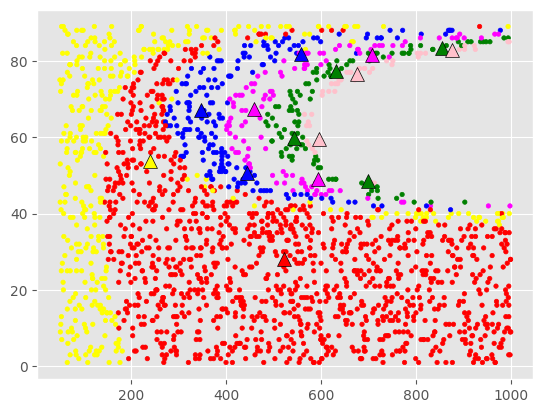

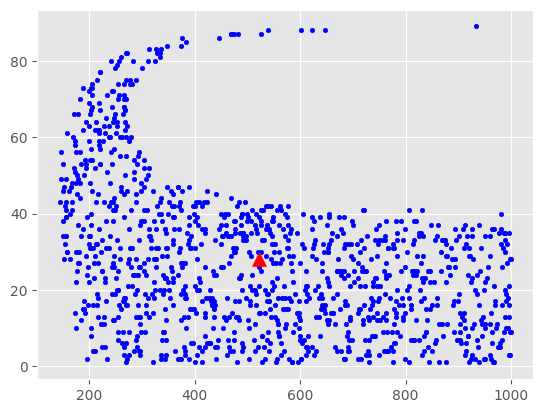

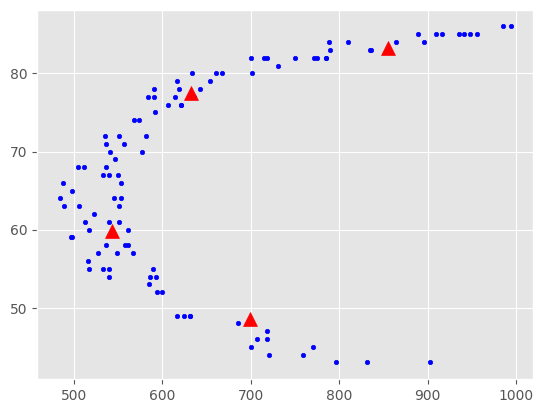

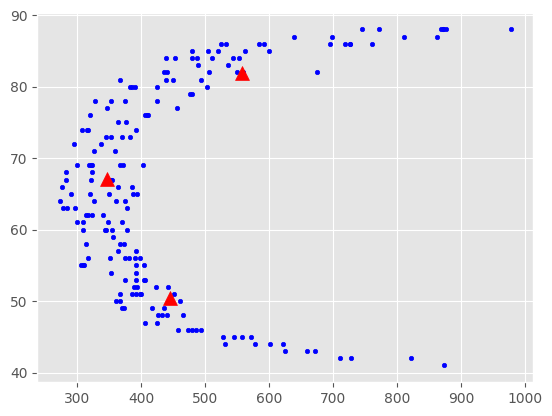

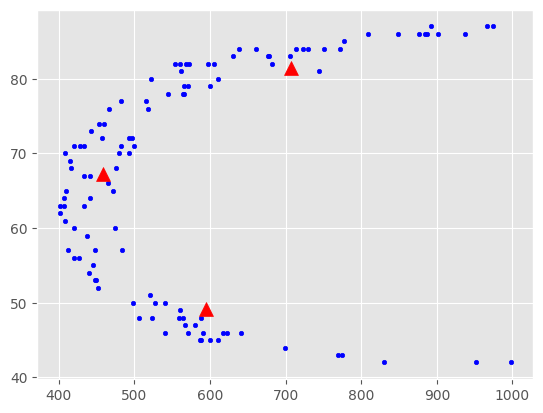

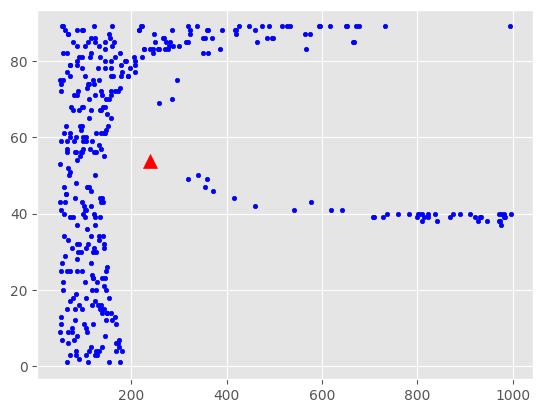

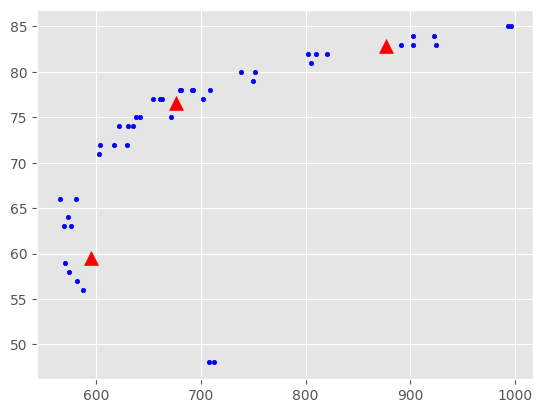

In [6]:
plt.scatter(df_data.magnitude, df_data.angle, c=list(map(color_picker,prototype_generator.m_samples_labeled['cluster_label'])), s=10)

for i, label in enumerate(set(prototype_generator.m_samples_labeled['cluster_label'])):
    local_ap = prototype_generator.prototypes_per_label[label]      
    plt.scatter(local_ap.T[0], local_ap.T[1], marker="^", s=100, color=colors[i], edgecolors='black')
plt.show()
for label in set(prototype_generator.m_samples_labeled['cluster_label']):
    plt.scatter(prototype_generator.m_samples_labeled[prototype_generator.m_samples_labeled['cluster_label']==label].magnitude, 
                prototype_generator.m_samples_labeled[prototype_generator.m_samples_labeled['cluster_label']==label].angle, 
                s=10, color='blue')
    local_ap = prototype_generator.prototypes_per_label[label]      
    plt.scatter(local_ap.T[0], local_ap.T[1], color="red", marker="^", s=100)
    plt.show()

